In [2]:
import copy
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import time
os.environ [ "TF_FORCE_GPU_ALLOW_GROWTH" ] = "true"

2022-08-13 21:39:34.770127: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
/home/j/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def make_preprocess(model, im_sz):
    if model == 'unet':
        def preprocess(img):
            return cv2.resize(img[490:1800, 900:2850], (im_sz,im_sz)).astype(np.float32) / 255
        return preprocess
    elif model == 'resnet152':
        def preprocess(img):
            return cv2.resize(img, (im_sz, im_sz))
        return preprocess


In [4]:
model_path = "./model_{}th_512.h5"
model = keras.models.load_model(model_path.format(1))


2022-08-13 21:39:46.179479: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-13 21:39:46.182483: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-13 21:39:46.269745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 21:39:46.272655: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.665GHz coreCount: 68 deviceMemorySize: 10.75GiB deviceMemoryBandwidth: 573.69GiB/s
2022-08-13 21:39:46.272712: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-08-13 21:39:46.339287: I tensorflow/stream_executor/platfor

In [5]:
cap = cv2.VideoCapture("../../../tvm-slicer/src/data/j_scan.mp4")
preprocess = make_preprocess('unet', 512)

In [6]:
for i in range(20):
    ret, frame = cap.read()


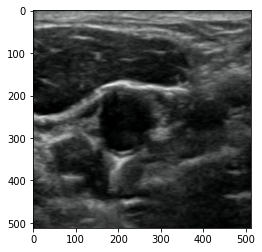

In [14]:
plt.imshow(preprocess(frame))

In [21]:
a=  model.predict(np.expand_dims(preprocess(frame), axis=0))

2022-08-13 21:44:52.079563: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2022-08-13 21:45:25.481619: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-08-13 21:45:27.001901: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


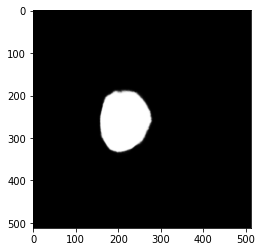

In [25]:
plt.imshow(a[0], cmap='gray')

In [24]:
a[0].shape

(512, 512, 1)